In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#from sklearn.mixture import GaussianMixture

In [3]:
data = pd.read_csv("credit_card_data.csv")
cluster_data = data[['CUST_ID','PURCHASES_TRX','CASH_ADVANCE_TRX']]

In [4]:
cluster_data.fillna(0, inplace=True)


C:\Users\Asiri Pramodaya\AppData\Local\Temp\ipykernel_10972\1900456280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.fillna(0, inplace=True)


In [5]:
customer_ids = cluster_data['CUST_ID']
cluster_data = cluster_data.drop('CUST_ID',axis=1)

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

In [7]:
scaled_data

array([[-0.51133325, -0.47606982],
       [-0.59179588,  0.11007385],
       [-0.10902012, -0.47606982],
       ...,
       [-0.39063931, -0.47606982],
       [-0.59179588, -0.18299798],
       [ 0.33352433, -0.18299798]])

In [8]:
wcss = [] #within cluster sum of squares 
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

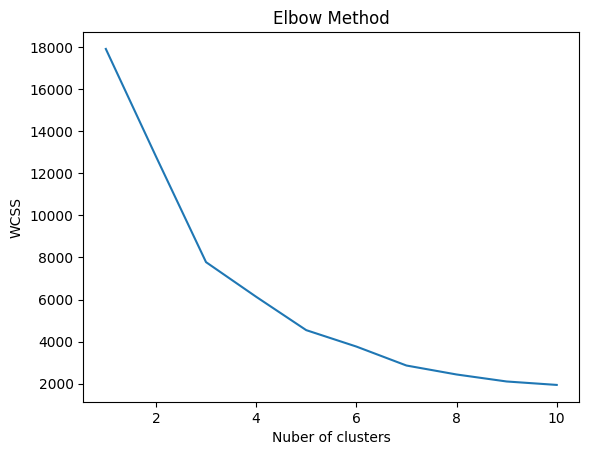

In [9]:
plt.plot(range(1,11), wcss) #within cluster sum of squares
plt.title('Elbow Method')
plt.xlabel('Nuber of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [11]:
cluster_data['CLUSTER'] = kmeans.labels_
clustered_data = pd.concat([customer_ids, cluster_data], axis=1)

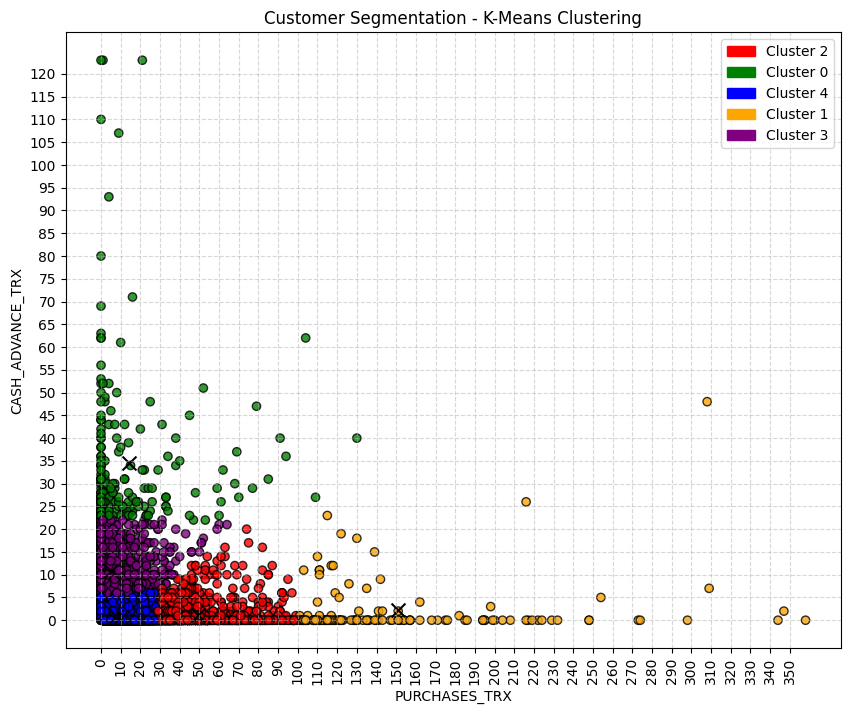

In [13]:
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
plt.figure(figsize=(10, 8))
cluster_numbers = clustered_data['CLUSTER'].unique()
cluster_colors = ['red', 'green', 'blue', 'orange', 'purple'][:len(cluster_numbers)]
custom_cmap = mcolors.ListedColormap(cluster_colors)
scatter = plt.scatter(clustered_data['PURCHASES_TRX'], clustered_data['CASH_ADVANCE_TRX'],
                      c=clustered_data['CLUSTER'], cmap=custom_cmap, alpha=0.8, edgecolor='k')
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=100, color='black', label='Centroids')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(np.arange(0, max(clustered_data['PURCHASES_TRX']) + 1, 10), rotation='vertical', ha='center')
plt.yticks(np.arange(0, max(clustered_data['CASH_ADVANCE_TRX']) + 1, 5))
plt.title('Customer Segmentation - K-Means Clustering')

plt.xlabel('PURCHASES_TRX')
plt.ylabel('CASH_ADVANCE_TRX')
legend_patches = [mpatches.Patch(color=cluster_colors[i], label='Cluster {}'.format(cluster_numbers[i]))
                  for i in range(len(cluster_numbers))]
plt.legend(handles=legend_patches)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
# Initialize variables
silhouette_scores = []
optimal_clusters = 0
best_score = -1
# Loop through cluster sizes and calculate silhouette score
for n_clusters in range(2, 11):  # Usually we start from 2 clusters since silhouette doesn't work well with 1
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Compute the average silhouette score
    score = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(score)
    
    # Track the best score and number of clusters
    if score > best_score:
        best_score = score
        optimal_clusters = n_clusters
print(f"The optimal number of clusters based on silhouette score is: {optimal_clusters}")